In [91]:
import xarray as xr
import numpy as np
import metpy
import matplotlib as mpl
import xesmf
import pylab as PP
import os
import sys
sys.path.insert(0,"./iliad/")
import interpolation.verticalInterpolation as vint
mpl.style.use('seaborn-poster')

```python
    filter_by_keys={'typeOfLevel': 'meanSea'}
    filter_by_keys={'typeOfLevel': 'hybrid'}
    filter_by_keys={'typeOfLevel': 'atmosphere'}
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'planetaryBoundaryLayer'}
    filter_by_keys={'typeOfLevel': 'isobaricInPa'}
    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
    filter_by_keys={'typeOfLevel': 'heightAboveSea'}
    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}
    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}
    filter_by_keys={'typeOfLevel': 'highCloudLayer'}
    filter_by_keys={'typeOfLevel': 'cloudCeiling'}
    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
    filter_by_keys={'typeOfLevel': 'tropopause'}
    filter_by_keys={'typeOfLevel': 'maxWind'}
    filter_by_keys={'typeOfLevel': 'isothermZero'}
    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}
    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigmaLayer'}
    filter_by_keys={'typeOfLevel': 'sigma'}
    filter_by_keys={'typeOfLevel': 'potentialVorticity'}
```

In [7]:
file_name = "grb_data/gfs_4_20210625_0000_000.grb2"
filter_dict = {'typeOfLevel': 'isobaricInhPa'}
pressure_xr = xr.open_dataset(file_name, engine = 'cfgrib', filter_by_keys = filter_dict)
filter_dict = {'typeOfLevel': 'surface'}
surface_xr = xr.open_dataset(file_name, engine = 'cfgrib', filter_by_keys = filter_dict)
filter_dict = {'typeOfLevel': 'sigma'}
near_surface_xr = xr.open_dataset(file_name, engine = 'cfgrib', filter_by_keys = filter_dict)

Ignoring index file 'grb_data/gfs_4_20210625_0000_000.grb2.923a8.idx' incompatible with GRIB file
skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "/N/u/obrienta/BigRed3/.conda/envs/climate_py38/lib/python3.8/site-packages/cfgrib/dataset.py", line 653, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/N/u/obrienta/BigRed3/.conda/envs/climate_py38/lib/python3.8/site-packages/cfgrib/dataset.py", line 584, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,

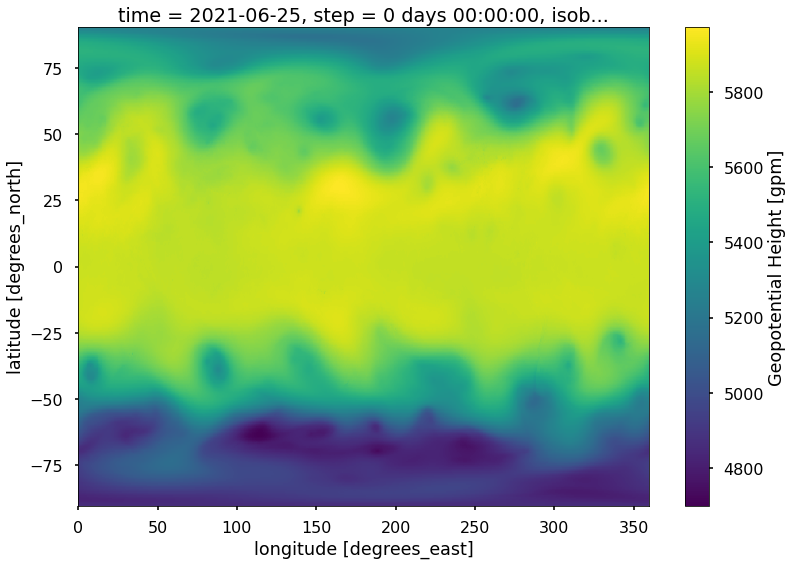

In [8]:
pressure_xr.sel(isobaricInhPa = 500)['gh'].plot()

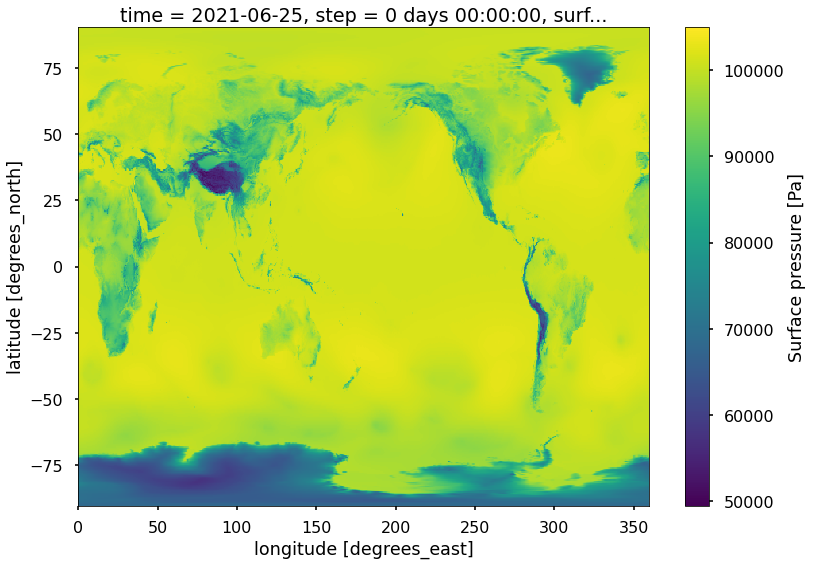

In [9]:
surface_xr['sp'].plot()

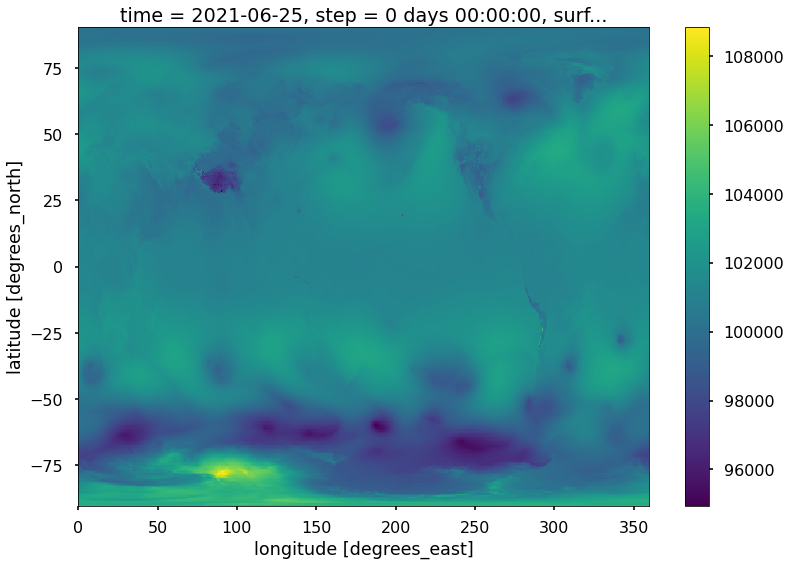

In [70]:
cₚ = 1004.
cᵥ = 717.
γ = cₚ/cᵥ
g = 9.806
Γ = -g/cₚ

def calc_psl(pₛ, zₛ, Tₛ):
    
    psl = pₛ*(1.0 + (Γ * zₛ)/(Tₛ - Γ*zₛ))**(-γ/(γ-1))
    return psl

def calc_pₛ(psl, zₛ, Tₛ):
    
    pₛ = psl*(1.0 + (Γ * zₛ)/(Tₛ - Γ*zₛ))**(γ/(γ-1))
    return pₛ

def calc_tsl(Tₛ, zₛ):
    tsl = Tₛ - Γ*zₛ
    return tsl

def calc_tₛ(tsl, zₛ):
    Tₛ = tsl + Γ*zₛ
    return Tₛ

pₛ = surface_xr["sp"]
Tₛ = surface_xr["t"]
zₛ = surface_xr["orog"]
psl = calc_psl(pₛ, zₛ, Tₛ)

psl.plot()

In [53]:
icbc_template_xr = xr.open_dataset("fog_ctd_control_ICBC.2000040100.nc")
icbc_template_xr

<xarray.Dataset>
Dimensions:  (iy: 96, jx: 96, kz: 30, time: 120)
Coordinates:
  * jx       (jx) float64 -9.5e+05 -9.3e+05 -9.1e+05 ... 9.1e+05 9.3e+05 9.5e+05
  * iy       (iy) float64 -9.5e+05 -9.3e+05 -9.1e+05 ... 9.1e+05 9.3e+05 9.5e+05
  * kz       (kz) float64 0.025 0.07511 0.1253 0.1755 ... 0.9725 0.9844 0.995
    xlon     (iy, jx) float32 ...
    xlat     (iy, jx) float32 ...
    dlon     (iy, jx) float32 ...
    dlat     (iy, jx) float32 ...
  * time     (time) datetime64[ns] 2000-04-01 ... 2000-04-30T18:00:00
Data variables:
    ptop     float64 ...
    mask     (iy, jx) float32 ...
    topo     (iy, jx) float32 ...
    ps       (time, iy, jx) float32 ...
    ts       (time, iy, jx) float32 ...
    t        (time, kz, iy, jx) float32 ...
    qv       (time, kz, iy, jx) float32 ...
    u        (time, kz, iy, jx) float32 ...
    v        (time, kz, iy, jx) float32 ...
    crs      |S1 ...
Attributes: (12/17)
    title:                           ICTP Regional Climatic model V4
    institution:                     ICTP
    source:                          RegCM Model output file
    executable_date:                 Mar 14 2020
    Conventions:                     CF-1.7
    references:                      http://gforge.ictp.it/gf/project/regcm
    ...                              ...
    latitude_of_projection_origin:   37.0
    longitude_of_projection_origin:  -122.0
    index_of_projection_origin:      [48. 48.]
    standard_parallel:               [30. 60.]
    grid_factor:                     0.0
    global_atm_source:               NNRP2

In [64]:
weight_file = "gfs2rcm_test_weights.nc"
reuse_weights = False
#if os.path.exists(weight_file):
#    reuse_weights = True
    
gfs2rcm = xesmf.Regridder(
    surface_xr,
    icbc_template_xr.rename(dict(dlat="lat",dlon="lon")).drop(['mask']),
    method = "bilinear",
    filename = weight_file,
    reuse_weights = reuse_weights
)

/N/u/obrienta/BigRed3/.conda/envs/climate_py38/lib/python3.8/site-packages/xesmf/frontend.py:522: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/N/u/obrienta/BigRed3/.conda/envs/climate_py38/lib/python3.8/site-packages/xesmf/frontend.py:522: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


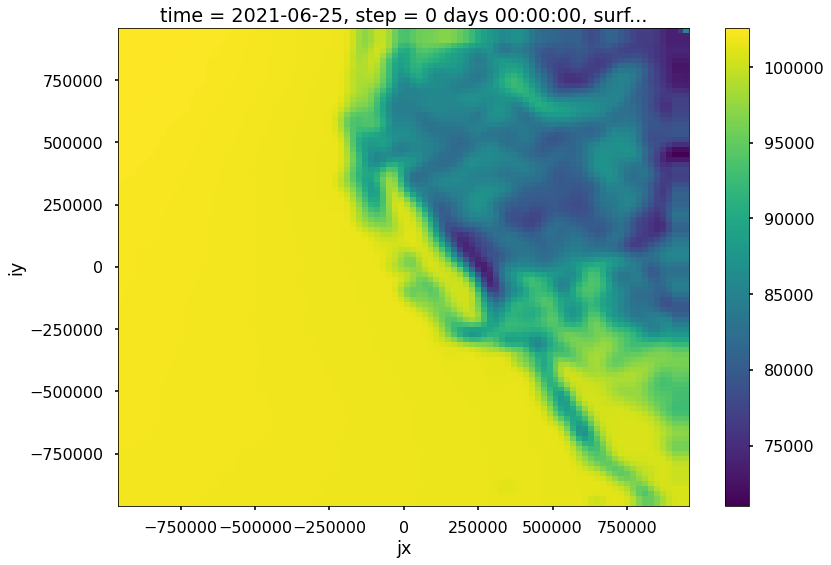

In [74]:
# interpolate sea-level pressure and temperature to the RCM grid
psl_rcm = gfs2rcm(calc_psl(surface_xr['sp'], surface_xr['orog'], surface_xr['t']))
tsl_rcm = gfs2rcm(calc_tsl(surface_xr['t'], surface_xr['orog']))

# convert sea-level pressure and temperature back to their orographic values
zₛ_rcm = icbc_template_xr['topo']
tₛ_rcm = calc_tₛ(tsl_rcm, zₛ_rcm)
pₛ_rcm = calc_pₛ(psl_rcm, zₛ_rcm, tₛ_rcm)
pₛ_rcm.plot()

In [88]:
# interpolate state fields to RCM grid
state_rcm_pressure = gfs2rcm(pressure_xr)

/N/u/obrienta/BigRed3/.conda/envs/climate_py38/lib/python3.8/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [112]:
# calculate RCM pressure
pₜ = icbc_template_xr['ptop'].values
σ = icbc_template_xr['kz'].values[:,np.newaxis, np.newaxis]
p_rcm = (ps_rcm.values[np.newaxis,:,:] - pₜ)*σ + pₜ

plevs = state_rcm_pressure['isobaricInhPa'].values * 100

gfs2rcm_var_mapping = dict(t = 't', q = 'qv', u = 'u', v = 'v')
for var in list(gfs2rcm_var_mapping):
    rcm_var = gfs2rcm_var_mapping[var]
    var_sigma = vint.interpolatePressureLevels(state_rcm_pressure[var].values, plevs, p_rcm, doExtrapolation=True, interpolationDimension=0)
    
    icbc_template_xr.loc[dict(time = icbc_template_xr.isel(time = 0)['time'])][rcm_var].values[:] = var_sigma
    
# also store the surface temperature and pressure
icbc_template_xr.loc[dict(time = icbc_template_xr.isel(time = 0)['time'])]['ps'].values[:] = ps_rcm
icbc_template_xr.loc[dict(time = icbc_template_xr.isel(time = 0)['time'])]['ts'].values[:] = ts_rcm
# write test file to disk
icbc_template_xr.loc[dict(time = icbc_template_xr.isel(time = 0)['time'])].to_netcdf("test.nc")

In [107]:
icbc_template_xr.loc[dict(time = icbc_template_xr.isel(time = 0)['time'])]

<xarray.Dataset>
Dimensions:  (iy: 96, jx: 96, kz: 30)
Coordinates:
  * jx       (jx) float64 -9.5e+05 -9.3e+05 -9.1e+05 ... 9.1e+05 9.3e+05 9.5e+05
  * iy       (iy) float64 -9.5e+05 -9.3e+05 -9.1e+05 ... 9.1e+05 9.3e+05 9.5e+05
  * kz       (kz) float64 0.025 0.07511 0.1253 0.1755 ... 0.9725 0.9844 0.995
    xlon     (iy, jx) float32 -131.4 -131.2 -131.0 ... -109.6 -109.4 -109.1
    xlat     (iy, jx) float32 28.06 28.08 28.1 28.12 ... 45.36 45.33 45.3 45.27
    dlon     (iy, jx) float32 -131.5 -131.3 -131.1 ... -109.8 -109.5 -109.3
    dlat     (iy, jx) float32 27.96 27.98 28.0 28.02 ... 45.28 45.25 45.22 45.2
    time     datetime64[ns] 2000-04-01
Data variables:
    ptop     float64 50.0
    mask     (iy, jx) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 2.0 2.0 2.0 2.0 2.0
    topo     (iy, jx) float32 0.0 0.0 0.0 0.0 ... 2.668e+03 2.418e+03 1.422e+03
    ps       (iy, jx) float32 ...
    ts       (iy, jx) float32 ...
    t        (kz, iy, jx) float32 ...
    qv       (kz, iy, jx) float32 ...
    u        (kz, iy, jx) float32 ...
    v        (kz, iy, jx) float32 ...
    crs      |S1 b''
Attributes: (12/17)
    title:                           ICTP Regional Climatic model V4
    institution:                     ICTP
    source:                          RegCM Model output file
    executable_date:                 Mar 14 2020
    Conventions:                     CF-1.7
    references:                      http://gforge.ictp.it/gf/project/regcm
    ...                              ...
    latitude_of_projection_origin:   37.0
    longitude_of_projection_origin:  -122.0
    index_of_projection_origin:      [48. 48.]
    standard_parallel:               [30. 60.]
    grid_factor:                     0.0
    global_atm_source:               NNRP2

In [109]:
state_rcm_pressure

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, iy: 96, jx: 96)
Coordinates:
    time           datetime64[ns] 2021-06-25
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
    valid_time     datetime64[ns] 2021-06-25
    lon            (iy, jx) float32 -131.5 -131.3 -131.1 ... -109.5 -109.3
    lat            (iy, jx) float32 27.96 27.98 28.0 28.02 ... 45.25 45.22 45.2
Dimensions without coordinates: iy, jx
Data variables:
    gh             (isobaricInhPa, iy, jx) float64 173.4 173.2 ... 4.892e+04
    t              (isobaricInhPa, iy, jx) float64 291.3 291.2 ... 269.0 268.9
    r              (isobaricInhPa, iy, jx) float64 84.12 82.88 81.48 ... 0.0 0.0
    q              (isobaricInhPa, iy, jx) float64 0.01093 0.01076 ... 3.759e-06
    w              (isobaricInhPa, iy, jx) float64 0.01312 0.02031 ... 0.0008213
    wz             (isobaricInhPa, iy, jx) float64 -0.0003409 ... -0.07215
    u              (isobaricInhPa, iy, jx) float64 -2.394 -2.393 ... -34.99
    v              (isobaricInhPa, iy, jx) float64 -3.972 -4.192 ... 2.595 2.505
    absv           (isobaricInhPa, iy, jx) float64 0.0001019 ... 8.585e-05
    o3mr           (isobaricInhPa, iy, jx) float64 6.406e-08 ... 4.783e-06
Attributes:
    regrid_method:  bilinear